# スーパー売上予測
参考：[Retail sales forcast](https://www.kaggle.com/aremoto/retail-sales-forecast)

# データをざっと眺めてみる

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('retail_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
print(data.shape)
print(data.columns)

(421570, 16)
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')


In [3]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-12-02,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-05-03,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [4]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-05-10,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-12-10,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667


## わかること
* Dateが時系列になってない
* Store, Deptの順で並んでるっぽい
* NaNが扱いにくそう

# データの内容
[Dataset -- Retail Data Analytics](https://www.kaggle.com/manjeetsingh/retaildataset)より

| 列 | 意味 |
| --| -- |
| Store | 店舗 |
| Dept | 売り場 |
| Date | 週のはじめの日付 |
| Weekly_Sales | 売り場の週刊売り上げ |
| InHoliday | その週が特別なホリデーウィークかどうか |
| Type | 店舗の種別 |
| Size | 店舗のサイズ |
| Temperature | 地域の平均気温（華氏） |
| Fuel_Price | 地域の燃料価格 |
| MarkDown1-5 | プロモーションの値下げデータ。ただし 2011年11月以降のみ |
| CPI | 消費者物価指数 |
| Unemployment | 失業率 |


In [5]:
# 気温が華氏だとよくわからないので摂氏に変換
data['Temperature'] = (data['Temperature'] - 32) * 5.0 / 9.0

# IsHolidayを0と1に変換
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

data['IsHoliday'] = LE.fit_transform(data['IsHoliday'])

data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,0,A,151315,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-12-02,46039.49,1,A,151315,3.616667,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,0,A,151315,4.405556,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,0,A,151315,8.127778,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-05-03,21827.90,0,A,151315,8.055556,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


結構温度低いね

# 各値の大まかな傾向を見てみる
Dateと各値の変化をプロットしてみよう

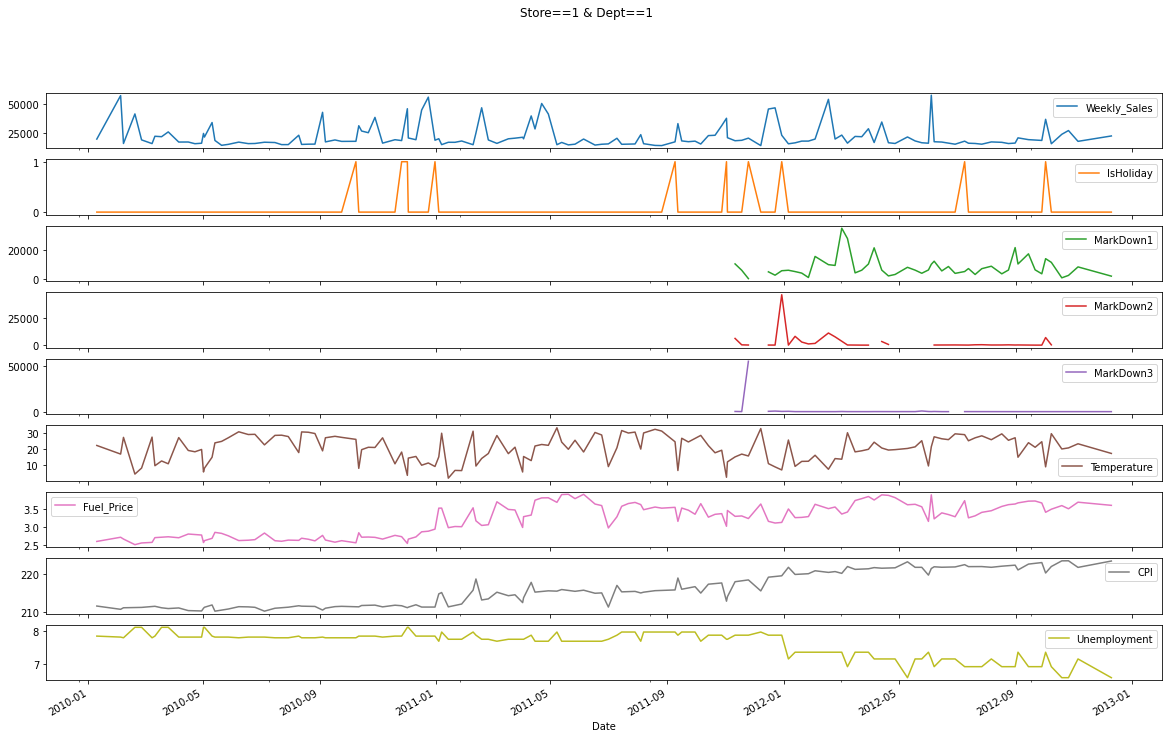

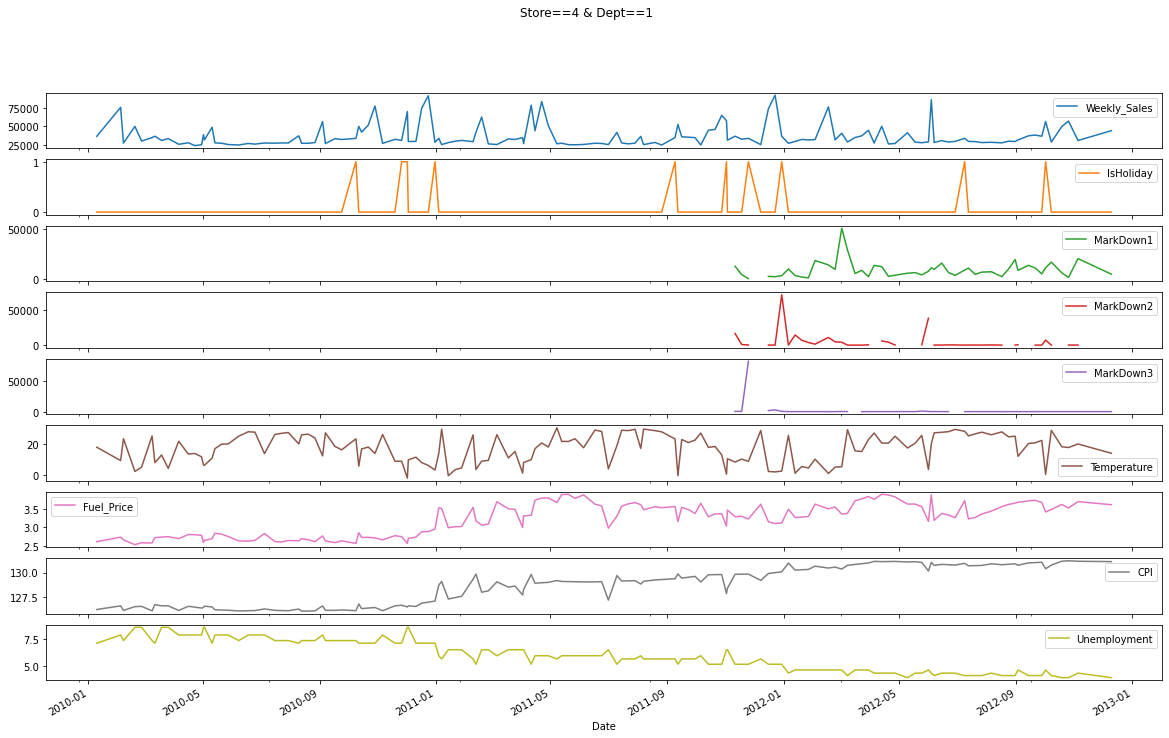

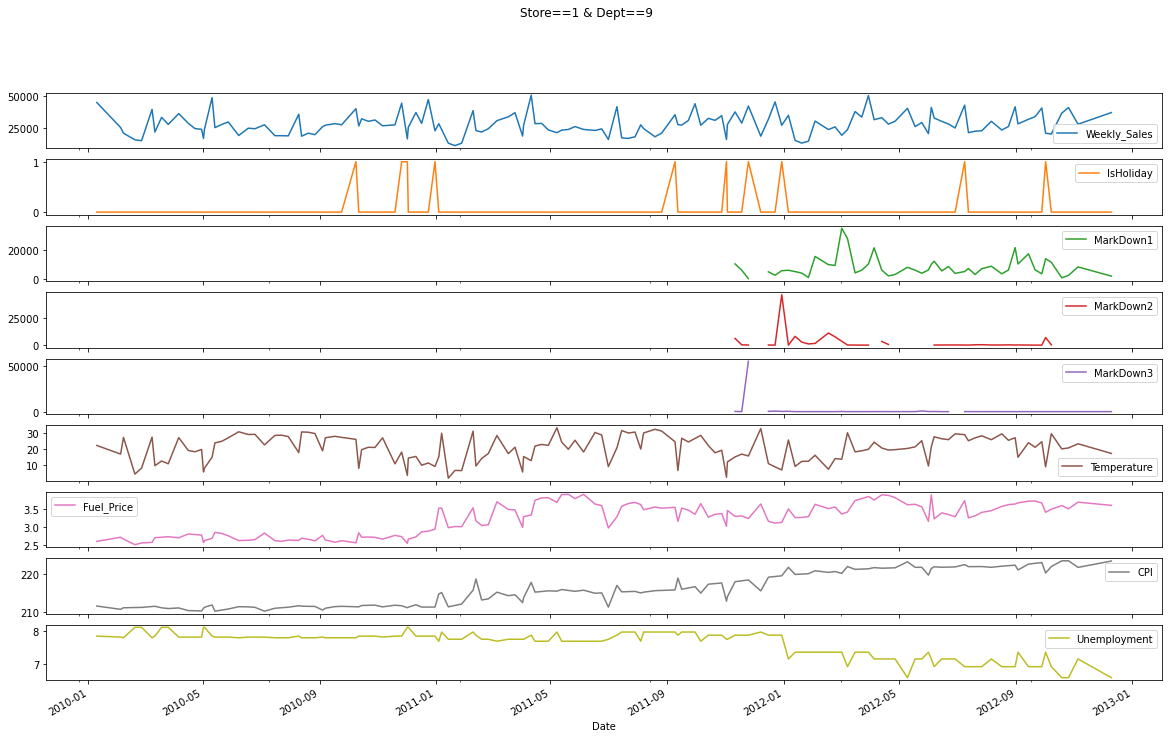

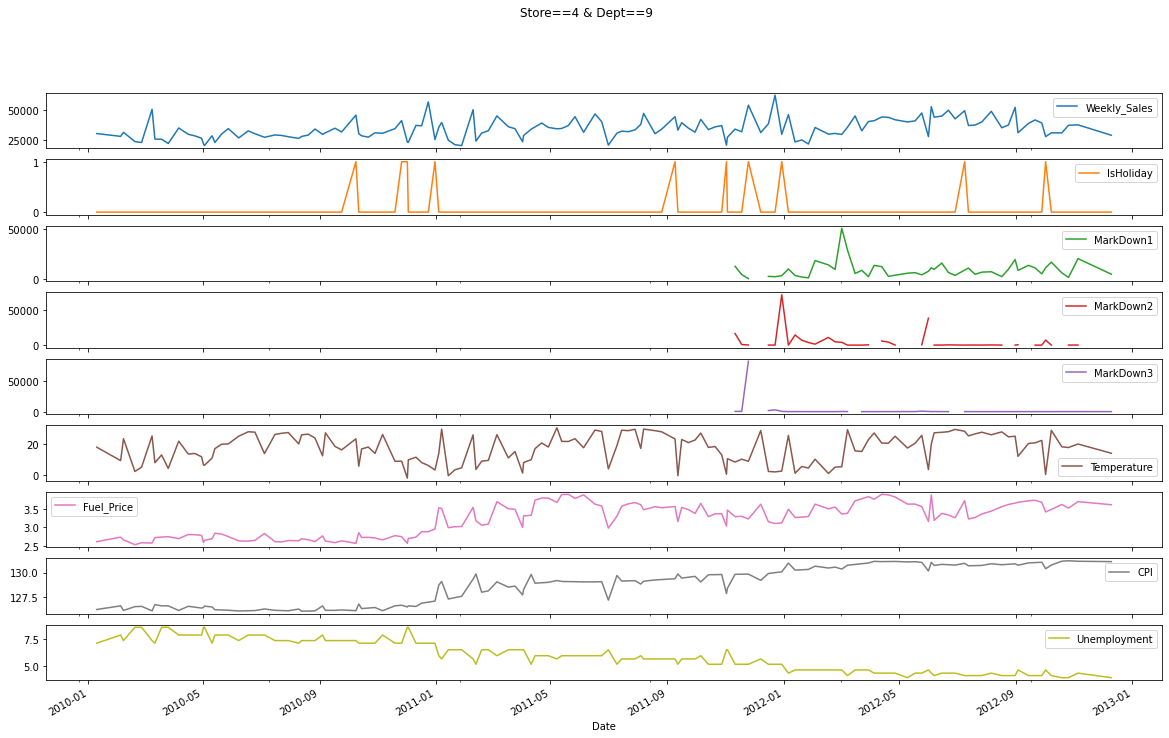

In [371]:
# 適当にサンプリングしてStore&Deptごとの売り上げをプロットしてみる
def plot_abstract_dept():
    columns = ['Date', 
               'Weekly_Sales', 
               'IsHoliday',
               'MarkDown1',
               'MarkDown2',
               'MarkDown3',
#               'MarkDown4',
#               'MarkDown5',
               'Temperature',
               'Fuel_Price',
               'CPI',
               'Unemployment']
    for d in [1, 9]:
        for s in [1, 4]:
            data.query(f'Store=={s} & Dept=={d}')[columns]\
            .plot(x='Date',
                  subplots=True,
                  title=f'Store=={s} & Dept=={d}',
                  figsize=(20, 12))
            plt.show()
            
plot_abstract_dept()

## わかること
* 2010年1月～2012年12月までのデータ
* StoreとDeptの組み合わせが一つの売り上げ単位っぽい。たぶん「イオン福岡の子供服売り場」みたいな感じかな？
    * 学習、予測するなら、特定のStoreとDept組み合わせについてやるのがいいだろう
* 同じDeptで別のStoreの売り上げは規模が違うが傾向が似ている。
* Dept==45とかは時系列が抜けちゃってる
* Store==10 & Dept==45で売り上げが0以下になってるの、なんなの。
* MarkDown2は結構相関がありそう。

# データについてもう少し調べる

In [7]:
# StoreとDeptのデータ数
def unique_store_dept(data):
    ud = {}
    for key in ['Store', 'Dept']:
        ud[key] = {'unique':data[key].nunique()}
    return pd.DataFrame(ud)
    
unique_store_dept(data)

,Store,Dept
unique,45,81


In [8]:
def information(data):
    return pd.DataFrame(data.dtypes).T.rename(index={0:'dtype'})\
        .append(data.describe())\
        .append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'isnull'}))\
        .append(pd.DataFrame(data.isna().sum()).T.rename(index={0:'isna'}))

information(data)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
dtype,int64,int64,datetime64[ns],float64,int64,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
count,421570,421570,NaN,421570,421570,NaN,421570,421570,421570,150681,111248,137091,134967,151432,421570,421570
mean,22.2005,44.2603,NaN,15981.3,0.0703584,NaN,136728,15.6056,3.36103,7246.42,3334.63,1439.42,3383.17,4628.98,171.202,7.96029
std,12.7853,30.4921,NaN,22711.2,0.25575,NaN,60980.6,10.2489,0.458515,8291.22,9475.36,9623.08,6292.38,5962.89,39.1593,1.8633
min,1,1,NaN,-4988.94,0,NaN,34875,-18.9222,2.472,0.27,-265.76,-29.1,0.22,135.16,126.064,3.879
25%,11,18,NaN,2079.65,0,NaN,93638,8.15556,2.933,2240.27,41.6,5.08,504.22,1878.44,132.023,6.891
50%,22,37,NaN,7612.03,0,NaN,140167,16.7167,3.452,5347.45,192,24.6,1481.31,3359.45,182.319,7.866
75%,33,74,NaN,20205.9,0,NaN,202505,23.4889,3.738,9210.9,1926.94,103.99,3595.04,5563.8,212.417,8.572
max,45,99,NaN,693099,1,NaN,219622,37.8556,4.468,88646.8,104520,141631,67474.9,108519,227.233,14.313
isnull,0,0,0,0,0,0,0,0,0,270889,310322,284479,286603,270138,0,0


Weekly_Salesのmin=-4988.94が光ってる。これは除去すべきかな。

# 特定のStore, Deptの売り上げを成分分析する

[Python: statsmodels で時系列データを基本成分に分解する](https://blog.amedama.jp/entry/sm-decompose-series)という解説記事を参考に、なぞってみます。

In [308]:
from statsmodels import api as sm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# ここからは特定のDeptだけを抽出して扱う
def filter_dept_data(data, store, dept):
    d = data.query(f'Store=={store} & Dept=={dept}')
    d = d.set_index('Date') # Dateでソートする
    d.index = pd.DatetimeIndex(d.index).to_period('W')
    d = d.sort_index()
    return d

# Store=4, Dept=8だけ抽出
dept_data = filter_dept_data(data, 4, 8)

dept_data

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Date,,,,,,,,,,,,,,,
2010-01-04/2010-01-10,4,8,65810.71,0,A,205863,17.755556,2.619,NaN,NaN,NaN,NaN,NaN,126.234600,7.127
2010-02-01/2010-02-07,4,8,64472.21,0,A,205863,23.144444,2.668,NaN,NaN,NaN,NaN,NaN,126.139200,7.372
2010-02-01/2010-02-07,4,8,67998.34,0,A,205863,9.316667,2.740,NaN,NaN,NaN,NaN,NaN,126.603484,7.896
2010-02-15/2010-02-21,4,8,67007.65,0,A,205863,2.472222,2.540,NaN,NaN,NaN,NaN,NaN,126.526286,8.623
2010-02-22/2010-02-28,4,8,66705.03,0,A,205863,5.200000,2.590,NaN,NaN,NaN,NaN,NaN,126.552286,8.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-08/2012-10-14,4,8,58854.51,0,A,205863,28.450000,3.476,16996.42,36.60,60.94,4777.20,3937.09,130.756161,4.077
2012-10-15/2012-10-21,4,8,60359.28,0,A,205863,18.033333,3.610,6313.84,NaN,15.05,2421.08,5885.12,131.149968,3.879
2012-10-22/2012-10-28,4,8,60917.72,0,A,205863,17.577778,3.514,1763.13,88.76,66.76,NaN,7577.14,131.193097,3.879


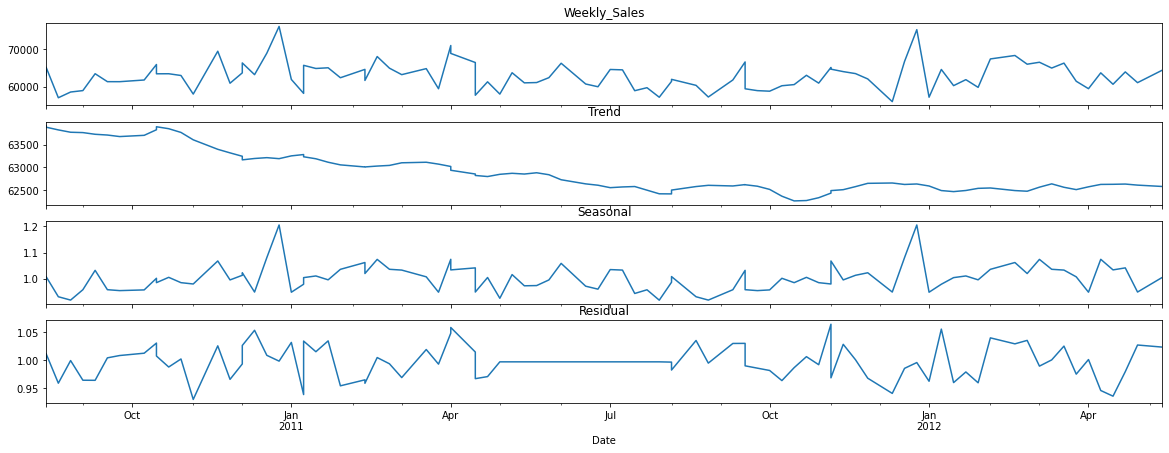

In [323]:
# 傾向変動、季節変動、残差に分解する
def decompose_data(series, period):
    return sm.tsa.seasonal_decompose(series, model='multiplicative', period=period)

def plot_decomposed(decomposed):
    _, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 7), sharex=True)
    decomposed.observed.plot(ax = axes[0], title = 'Weekly_Sales')
    decomposed.trend.plot(ax = axes[1], title = 'Trend')
    decomposed.seasonal.plot(ax = axes[2], title = 'Seasonal')
    decomposed.resid.dropna().plot(ax = axes[3], title = 'Residual')

# 1年間のトレンドで見てみる
plot_decomposed(decompose_data(dept_data['Weekly_Sales'], 52))

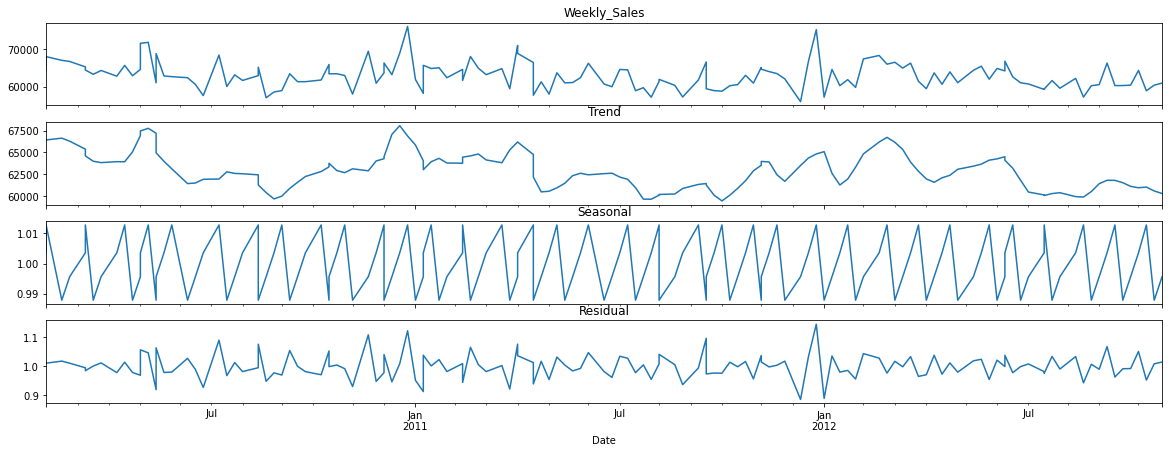

In [322]:
# 月単位のトレンドで見てみる
plot_decomposed(decompose_data(dept_data['Weekly_Sales'], 4))

## わかること

* 52週単位のトレンドをとってみると若干右肩下がりのトレンドがありそう？
* 年末年始のところに大きなピークがあるので、52週単位で見れば季節性があることになる
* ただ、52週の季節性を除去したResidualは前後1年ずつが使えなくなってしまってデータ件数としては寂しい


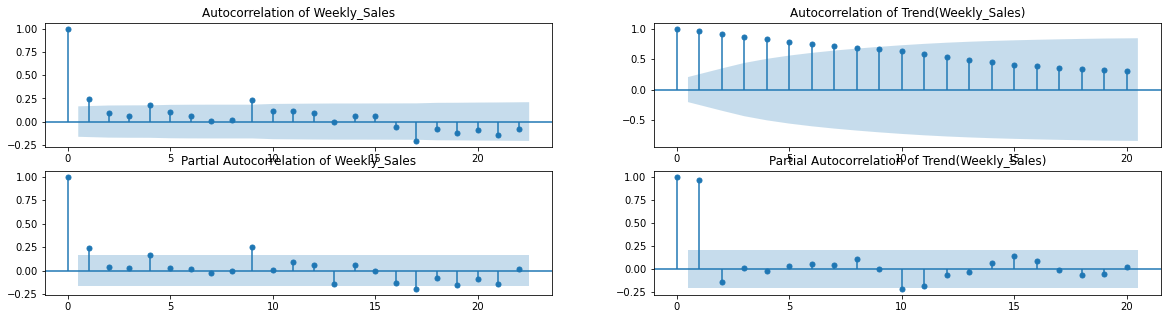

In [61]:
# 自己相関を確認する

def plot_autocorrelation(original, decomposed):
    _, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 5))

    # 原系列の ACF
    sm.tsa.graphics.plot_acf(original, ax=axes[0][0])
    axes[0][0].set_title('Autocorrelation of Weekly_Sales')
    # 原系列の PACF
    sm.tsa.graphics.plot_pacf(original, ax=axes[1][0])
    axes[1][0].set_title('Partial Autocorrelation of Weekly_Sales')

    # 傾向変動の ACF
    sm.tsa.graphics.plot_acf(decomposed.trend.dropna(), ax=axes[0][1])
    axes[0][1].set_title('Autocorrelation of Trend(Weekly_Sales)')
    # 傾向変動の PACF
    sm.tsa.graphics.plot_pacf(decomposed.trend.dropna(), ax=axes[1][1])
    axes[1][1].set_title('Partial Autocorrelation of Trend(Weekly_Sales)')
    
    # グラフを表示する
    plt.show()
    
plot_autocorrelation(dept_data['Weekly_Sales'], decompose_data(dept_data['Weekly_Sales'], 52))

# plot_autocorrelation(dept_data['Weekly_Sales'], decompose_data(dept_data['Weekly_Sales'], 4))


## わかること
* 水色の帯からはずれているところが自己相関がありそうな次数
* たとえば9のところが若干出っ張っているのは今週の売上が9週前の売上に若干相関がある
    * が、データ件数が少ないのもあり、単なるノイズがたまたま乗っただけでしょとも考えられる
* トレンドは移動平均で出しているので、前週、前前週と自己相関があるのは当たり前。当たり前の部分を超えて相関がある次数はないといえる
* 元のデータからしてあんまり自己相関がないようなので、トレンドや季節変動を取り除く必要はなさそう。

# ディッキー・フラー検定

データが定常状態かどうかを判定するためのテスト。
[statsmodelsのadfuller関数](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html)で簡単に行えるのでやってみます。

In [64]:
def test_dicky_fuller(series):
    for r in ['c', 'ct', 'ctt', 'nc']:
        d = sm.tsa.stattools.adfuller(series, regression=r)
        if d[1] < 0.1:
            print(f'regression={r}: OK. ({d[1]} < 0.1)')
        else:
            print(f'regression={r}: Not OK. result={d[1]}.')
            
test_dicky_fuller(dept_data['Weekly_Sales'])

regression=c: OK. (1.255437860345064e-15 < 0.1)
regression=ct: OK. (1.0015149893299212e-14 < 0.1)
regression=ctt: OK. (2.7513155873405505e-14 < 0.1)
regression=nc: Not OK. result=0.4663237024352996.


[regression=nc（定数なし、トレンドなし）の場合](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html)に検定にひっかかる

In [65]:
decomposed = decompose_data(dept_data['Weekly_Sales'], 4) # 1ヶ月単位のトレンド
test_dicky_fuller(decomposed.resid.dropna())

decomposed = decompose_data(dept_data['Weekly_Sales'], 52) # 1年単位のトレンド
test_dicky_fuller(decomposed.resid.dropna())

regression=c: OK. (9.151324554961116e-11 < 0.1)
regression=ct: OK. (1.987827625953312e-09 < 0.1)
regression=ctt: OK. (1.1290922302274542e-08 < 0.1)
regression=nc: Not OK. result=0.6849358859433325.
regression=c: OK. (0.00017081665458593652 < 0.1)
regression=ct: OK. (0.00030846511006304294 < 0.1)
regression=ctt: OK. (0.0006038327503664816 < 0.1)
regression=nc: Not OK. result=0.6241954617753677.


季節変動を除去してみても大差ない。
わからないので元データのまま先に進みます

# 予測をしてみよう(statsmodels)

## 使用ライブラリ
時系列データの予測にはscikit-learnのようなデファクトのツールがまだ無いそうです。
選択肢としては

* [statsmodels](https://www.statsmodels.org/stable/index.html)
* [prophet](https://facebook.github.io/prophet/)
* [Pytorch](https://pytorch.org/)

などがあり、それらをラップしたツール[Darts](https://github.com/unit8co/darts)があるそうです。

今回はまずはここまで import で使ってきた statsmodels をそのまま使っていきます。

## モデル選定
まず練習のため、トレンドと周期性と外因性を扱うことができるSARIMAXモデルを使ってみます。（外因性としてMarkDownやIsHolidayを入れたい！）

In [142]:
# データを分割
train_data = dept_data[dept_data.index < '2012-09-01']
test_data = dept_data[dept_data.index >= '2012-09-01']
print(train_data['Weekly_Sales'].size)
print(test_data['Weekly_Sales'].size)

132
11


## aic最小のパラメータ
SARIMAXに与える係数を総当りで決める。いろんな係数（280パターン）を与えて実際に学習させてみて、`aic`の値が最小になるパラメータセットを選択する。

In [347]:
# SARIMAXの係数をaicを用いて自動的に決定する（aicが最小になる…わかってない、あとで勉強する）
import itertools as it

def determin_sarimax_params(series):
    ps = range(1, 4)
    qs = range(0, 4)
    ds = range(0, 3)
    sps = range(0, 2)
    sqs = range(0, 2)
    sds = range(0, 2)
    patterns = it.product(ps, qs, ds, sps, sqs, sds)
    entries = list()
    for params in patterns:
        p, q, d, sp, sq, sd = params
        sarima = sm.tsa.SARIMAX(
            series,
            order = (p, d, q),
            seasonal_order=(sp, sd, sq, 52),
            enforce_stationarity = False,
            enforce_invertibility = False
        ).fit()
        entries.append({'pattern': (p, q, d, sp, sq, sd), 'aic': sarima.aic})

    table = pd.DataFrame(entries)
    return table
        
        
aics = determin_sarimax_params(train_data['Weekly_Sales']).sort_values(by = 'aic')
aics

/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood opti

/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-p

,pattern,aic
187,"(2, 3, 2, 0, 1, 1)",435.636138
91,"(1, 3, 2, 0, 1, 1)",436.240920
283,"(3, 3, 2, 0, 1, 1)",437.271725
191,"(2, 3, 2, 1, 1, 1)",437.325452
95,"(1, 3, 2, 1, 1, 1)",438.594245
...,...,...
40,"(1, 1, 2, 0, 0, 0)",2562.905581
112,"(2, 0, 2, 0, 0, 0)",2567.772873
0,"(1, 0, 0, 0, 0, 0)",2586.411844
16,"(1, 0, 2, 0, 0, 0)",2620.445162


In [346]:
print('aic最小になる組み合わせ：(p, q, d, sp, sq, sd) = ', aics['pattern'].values[0])

aic最小になる組み合わせ：(p, q, d, sp, sq, sd) =  (2, 3, 2, 0, 1, 1)


が、必ずしもaic最小だけが最高のパラメータとは限らないので、いったんこのaicを求めたパラメータセットは全部保持しておく。

In [326]:
# Ljungbox検定。空のデータセットが返ってほしい（わかってない。あとで勉強）
def ljungbox_test_sarima(series, parameters):
    p, q, d, sp, sq, sd = parameters
    sarima = sm.tsa.SARIMAX(
        series,
        order = (p, d, q),
        seasonal_order=(sp, sd, sq, 52),
        enforce_stationarity = False,
        enforce_invertibility = False
    ).fit()
    ljungbox_result = sm.stats.diagnostic.acorr_ljungbox(sarima.resid, lags=10)
    df_ljungbox_result = pd.DataFrame({"p-value":ljungbox_result[1]})
    df_ljungbox_result[df_ljungbox_result["p-value"] <  0.05]
    return df_ljungbox_result
    

ljungbox_test_sarima(dept_data['Weekly_Sales'], aics['pattern'].values[0])

/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


,p-value
0,0.034713
1,0.072891
2,0.062571
3,0.112065
4,0.179803
5,0.267682
6,0.259469
7,0.300183
8,0.389196
9,0.481868


indexをいくつに変えても空になることはないので、あきらめて先頭のパラメータを使うことにします。

# SARIMAXモデルでの予測をしてみる

'2012-09-01'以前のデータを教師データとしてSARIMAXモデルに学習させ
* モデルが予測した'2012-09-01'以降の売上
* '2012-09-01'以降の実際の売上データ

を比較します。

/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


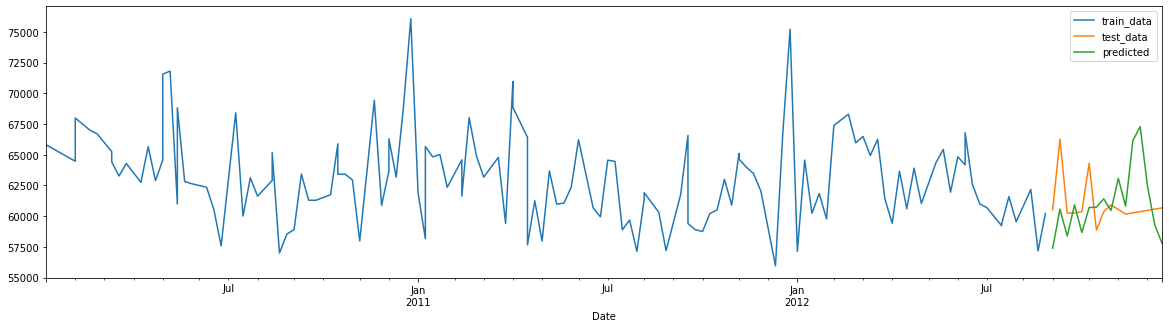

In [327]:
# 学習
def train(train_series, parameters):
    p, q, d, sp, sq, sd = parameters
    return sm.tsa.SARIMAX(
        train_series,
        order = (p, d, q),
        seasonal_order=(sp, sd, sq, 52),
        enforce_stationarity = False,
        enforce_invertibility = False
    ).fit()

# 予測
def predict(sarima, period_begin, period_end):
    return sarima.predict(period_begin, period_end)
    
# テスト
def test_train_predict(train_series, parameters, test_series):
    model = train(train_series, parameters)
    period_begin = test_series.index.values[0]
    period_end = test_series.index.values[test_series.size - 1]
    result = predict(model, period_begin, period_end)
    
    _, ax = plt.subplots(figsize=(20, 5))
    l1 = train_series.plot(label='train_data', ax = ax)
    l2 = test_series.plot(label='test_data', ax = ax)
    l3 = result.plot(label='predicted', ax = ax)
    plt.legend()

# aic最小となるパラメータセットを使ってテスト
test_train_predict(train_data['Weekly_Sales'], aics['pattern'].values[0], test_data['Weekly_Sales'])

うーん…あんまり。

試しに別のパラメータセットでも試してみます。

/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


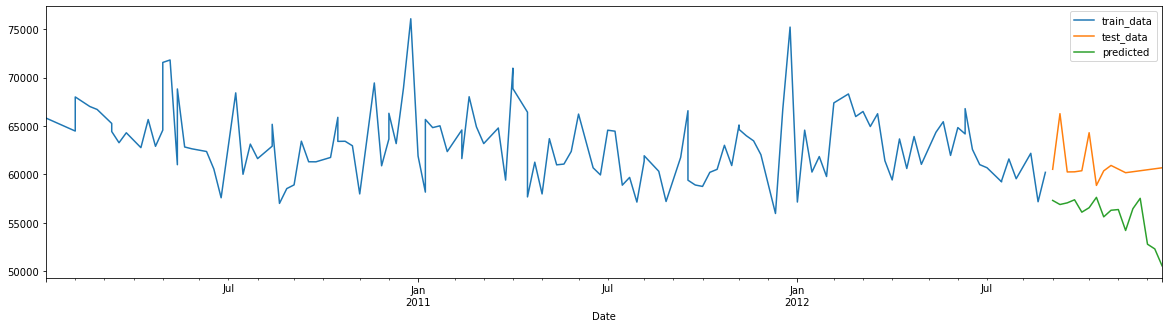

In [364]:
test_train_predict(train_data['Weekly_Sales'], aics['pattern'].values[2], test_data['Weekly_Sales'])

離れた。

# SARIMAXモデルで外生変数（exogenous）を扱う
IsHolidayやMarkDown2は売上に相関がありそうなので、考慮に入れてみます。

## パラメータセットを再度決める

In [348]:
# 外生変数を入れてaic最小となるパラメータセットを探す
def determin_sarimax_params_x(series, ex_series):
    ps = range(1, 4)
    qs = range(0, 4)
    ds = range(0, 3)
    sps = range(0, 2)
    sqs = range(0, 2)
    sds = range(0, 2)
    patterns = it.product(ps, qs, ds, sps, sqs, sds)
    entries = list()
    for params in patterns:
        p, q, d, sp, sq, sd = params
        sarima = sm.tsa.SARIMAX(
            series,
            ex_series,
            order = (p, d, q),
            seasonal_order=(sp, sd, sq, 52),
            enforce_stationarity = False,
            enforce_invertibility = False
        ).fit()
        entries.append({'pattern': (p, q, d, sp, sq, sd), 'aic': sarima.aic})

    table = pd.DataFrame(entries)
    return table
        
# IsHolidayを外生変数としたときのaicテーブル
aicsx1 = determin_sarimax_params_x(train_data['Weekly_Sales'], train_data['IsHoliday']).sort_values(by = 'aic')
aicsx1

/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood opti

,pattern,aic
67,"(1, 2, 2, 0, 1, 1)",429.676304
83,"(1, 3, 1, 0, 1, 1)",431.999946
191,"(2, 3, 2, 1, 1, 1)",434.951396
275,"(3, 3, 1, 0, 1, 1)",437.289147
187,"(2, 3, 2, 0, 1, 1)",437.985754
...,...,...
120,"(2, 1, 0, 0, 0, 0)",2907.511433
24,"(1, 1, 0, 0, 0, 0)",2908.597741
192,"(3, 0, 0, 0, 0, 0)",2922.033771
96,"(2, 0, 0, 0, 0, 0)",2951.773784


In [349]:
print('aic最小になる組み合わせ：(p, q, d, sp, sq, sd) = ', aicsx1['pattern'].values[0])

aic最小になる組み合わせ：(p, q, d, sp, sq, sd) =  (1, 2, 2, 0, 1, 1)


In [359]:
# MarkDown2を外生変数としたときのaicテーブル
aicsx2 = determin_sarimax_params_x(train_data['Weekly_Sales'], train_data['MarkDown2'].fillna(0)).sort_values(by = 'aic')
aicsx2

/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood opti

/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/fujita/opt/anaconda3/lib/python3.8/site-p

,pattern,aic
91,"(1, 3, 2, 0, 1, 1)",437.305353
187,"(2, 3, 2, 0, 1, 1)",437.487964
283,"(3, 3, 2, 0, 1, 1)",438.297026
95,"(1, 3, 2, 1, 1, 1)",439.204999
287,"(3, 3, 2, 1, 1, 1)",440.229367
...,...,...
240,"(3, 2, 0, 0, 0, 0)",2726.783298
24,"(1, 1, 0, 0, 0, 0)",2733.608808
120,"(2, 1, 0, 0, 0, 0)",2734.051494
96,"(2, 0, 0, 0, 0, 0)",2750.996935


In [361]:
print('aic最小になる組み合わせ：(p, q, d, sp, sq, sd) = ', aicsx2['pattern'].values[0])

aic最小になる組み合わせ：(p, q, d, sp, sq, sd) =  (1, 3, 2, 0, 1, 1)


## 学習して予測

In [367]:
# 学習
def train_x(train_series, train_ex_series1, p, q, d, sp, sq, sd):
    exog = pd.DataFrame(train_ex_series1)
    return sm.tsa.SARIMAX(
        train_series,
        train_ex_series1,
        order = (p, d, q),
        seasonal_order=(sp, sd, sq, 52),
        enforce_stationarity = False,
        enforce_invertibility = False
    ).fit()

# 予測
def predict_x(sarima, period_begin, period_end, ex_series1):
    exog = sm.add_constant(ex_series1)
    return sarima.predict(period_begin, period_end, exog=exog)
    
# テスト
def test_train_predict_x(train_series, train_ex_series1, parameters, test_series, test_ex_series1):
    # 学習
    p, q, d, sp, sq, sd = parameters
    print(parameters)
    model = train_x(train_series, train_ex_series1, p, q, d, sp, sq, sd)
    # 予測
    period_begin = test_series.index.values[0]
    period_end = test_series.index.values[test_series.size - 1]
    result = predict_x(model, period_begin, period_end, test_ex_series1)
    # プロット
    _, ax = plt.subplots(figsize=(20, 5))
    l1 = train_series.plot(label='train_data', ax = ax)
    l2 = test_series.plot(label='test_data', ax = ax)
    l3 = result.plot(label='predicted', ax = ax)
    plt.legend()
    

(1, 2, 2, 0, 1, 1)


/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


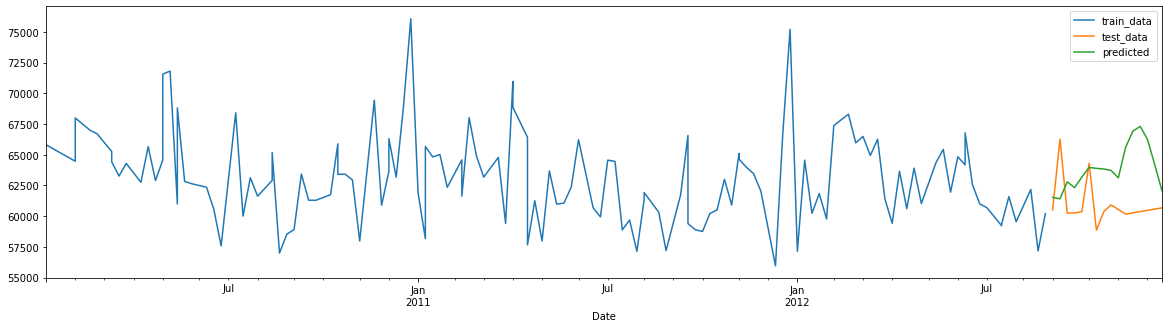

In [368]:
# IsHolidayを外生変数としてテスト、プロット
test_train_predict_x(train_data['Weekly_Sales'], 
                     train_data['IsHoliday'], 
                     aicsx1['pattern'].values[0], 
                     test_data['Weekly_Sales'], 
                     test_data['IsHoliday'])


……あまり変わってる感じはしません。test期間のうちIsHoliday=1になるのは1回だけだし。

外生変数を学習したから変化したというより、外生変数ありでaic最小になるパラメータセットを使ったから変化したのではないかと思います。

(1, 3, 2, 0, 1, 1)


/Users/fujita/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


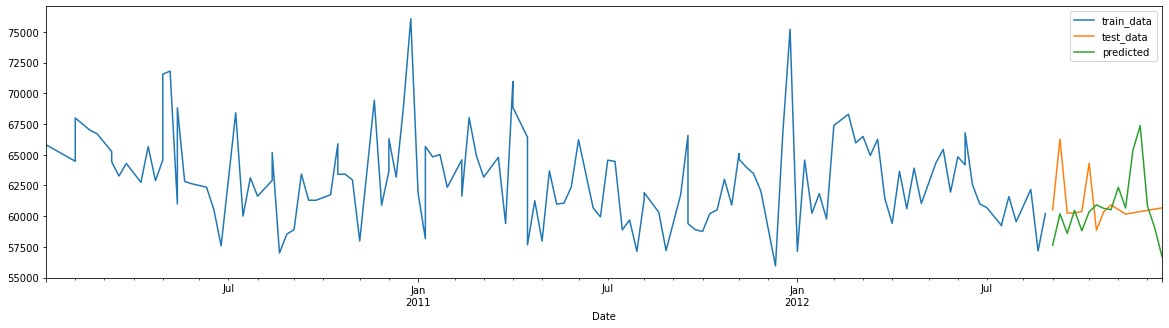

In [365]:
# MarkDown2をexogenousにしてみる
test_train_predict_x(train_data['Weekly_Sales'], 
                      train_data['MarkDown2'].fillna(0), 
                      aicsx2['pattern'].values[0], 
                      test_data['Weekly_Sales'], 
                      test_data['MarkDown2'].fillna(0))



MarkDown2についても同じことが言えそうです。